In [3]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import sklearn.datasets as dataset
import matplotlib.pyplot as plt

In [4]:
df = dataset.load_iris(as_frame=True)
y = df['target']
feature_names = df['feature_names']

df = pd.DataFrame(df['data'], columns=feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df = df - df.mean()

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333


In [8]:
cov_ = df.cov()

In [9]:
cov_

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [10]:
eig_values, eig_vectors = np.linalg.eig(cov_)

In [11]:
e_indices = np.argsort(eig_values)[::-1]

In [12]:
eigenvectors_sorted = eig_vectors[:,e_indices]
eigenvectors_sorted

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [13]:
variance_explained = []
for i in eig_values:
    variance_explained.append((i/sum(eig_values)))

In [14]:
variance_explained, sum(variance_explained)

([0.9246187232017269,
  0.05306648311706791,
  0.01710260980792974,
  0.005212183873275368],
 1.0)

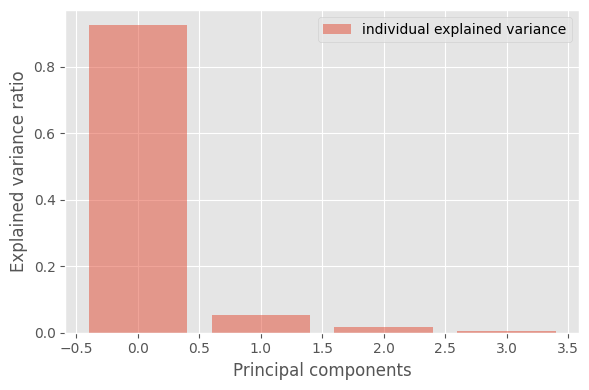

In [15]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), variance_explained, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend()
    plt.tight_layout()

In [16]:
pca = PCA()

In [17]:
df_pca = pca.fit_transform(df)

In [18]:
df.shape, df_pca.shape, len(feature_names)

((150, 4), (150, 4), 4)

In [26]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [19]:
df_loadings = pd.DataFrame(
    pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(feature_names)+1)],
    index=df.columns
)

In [20]:
df_loadings.head()

,PC1,PC2,PC3,PC4
sepal length (cm),0.743108,0.323446,-0.162770,-0.048707
sepal width (cm),-0.173801,0.359689,0.167212,0.049361
petal length (cm),1.761545,-0.085406,0.021320,0.074081
petal width (cm),0.736739,-0.037183,0.152647,-0.116354


In [21]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.92461872, 0.05306648, 0.01710261, 0.00521218]), 1.0)

In [22]:
variance_explained, sum(variance_explained)

([0.9246187232017269,
  0.05306648311706791,
  0.01710260980792974,
  0.005212183873275368],
 1.0)

In [23]:
eigenvectors_sorted.T * np.sqrt( variance_explained )

array([[ 0.34749885, -0.01947074,  0.11203277,  0.02586685],
       [-0.6313567 , -0.16820118,  0.02267315,  0.00544939],
       [-0.55966301,  0.13773572,  0.00996992,  0.03940655],
       [ 0.30336332, -0.07365194, -0.06275188,  0.05441064]])

In [24]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])